In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [38]:
class mdp():

    def __init__(self, gamma,iters):
        self.gamma = gamma
        self.iters = iters
        self.grid = [[0] * 5 for _ in range(5)]
        self.value_history = []

    # Define the move to the left
    # return structure: [reward, x after action, y after action] 
    def move_left(self, x, y):
        if x == 0:
            return  [(-1),0,y]
        elif x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        else:
            return [0,x-1,y]

    # Define the move to the right
    # return structure: [reward, x after action, y after action]
    def move_right(self,x, y):
        if x == 4:
            return [(-1),4,y]
        elif x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        else:
            return [0,x+1,y]

    # Define the move up
    # return structure: [reward, x after action, y after action]
    def move_up(self,x, y):
        if x == 3 and y == 0:
            return [5,3,2]
        elif x == 1 and y == 0:
            return [10,1,4]
        elif y == 0:
            return [(-1),x,y]
        else:
            return [0,x,y-1]        

    # Define the move down
    # return structure: [reward, x after action, y after action]
    def move_down(self,x, y):
        if x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        elif y == 4:
            return [(-1),x,y]
        else:
            return [0,x,y+1]

    # The iterative Bellmann function depending on state values
    def iterativeBellmann(self):
        # Define temporary grid to save temporary solutions for the value functions
        tmpGrid = [[0] * 5 for _ in range(5)]

        # Iterate over the defined steps
        for i in range (self.iters):
            # iterate through the 5 x 5 grid
            for y in range (5): 
                for x in range (5):
                    # Get the rewards and places after the movement for each cell in the grid
                    left = self.move_left(x, y)
                    right = self.move_right(x, y)
                    up = self.move_up(x, y)
                    down = self.move_down(x, y)
                    
                    # Save the result of the new state function calculation for each grid cell 
                    tmpGrid[y][x] = (0.25 * (left[0] + (self.gamma) * self.grid[left[1]][left[2]]) 
                    + 0.25 * (right[0] + (self.gamma) * self.grid[right[1]][right[2]]) 
                    + 0.25 * (up[0] + (self.gamma) * self.grid[up[1]][up[2]]) 
                    + 0.25 * (down[0] + (self.gamma) * self.grid[down[1]][down[2]]))    

            # After each iteration save the temporary results in a new cell of the array list.
            # This list will be used to display the results later 
            self.value_history.append([tmpGrid[y][x] for y in range(5) for x in range(5)])
            # Save the new result grid as the new state value function grid
            self.grid = tmpGrid    
        
        # Visualize the grids    
        self.visualize_convergence()
        
        
        print(self.grid[0])
        print(self.grid[1])
        print(self.grid[2])
        print(self.grid[3])
        print(self.grid[4])
    
    def visualize_convergence(self):
        # Erstelle ein Diagramm der Konvergenz mit Subplots für jede Zelle
        fig, axes = plt.subplots(5, 5, figsize=(20, 20))
        fig.suptitle('Konvergenz der State Value-Funktion über Iterationen', fontsize=16)

        for y in range(5):
            for x in range(5):
                # Werte für die aktuelle Zelle extrahieren
                values = [iteration[y * 5 + x] for iteration in self.value_history]
                axes[y, x].plot(values, label=f'Feld ({y}, {x})', color='blue')
                final_value = f'{values[-1]:.5f}'  # Letzter Wert auf 5 Nachkommastellen begrenzt
                axes[y, x].set_title(f'Feld ({y}, {x}) - Finaler Wert: {final_value}')
                axes[y, x].set_xlabel('Iteration')
                axes[y, x].set_ylabel('State Value')
                axes[y, x].legend(loc='upper left')
                axes[y, x].grid()

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Titel
        plt.show()
        

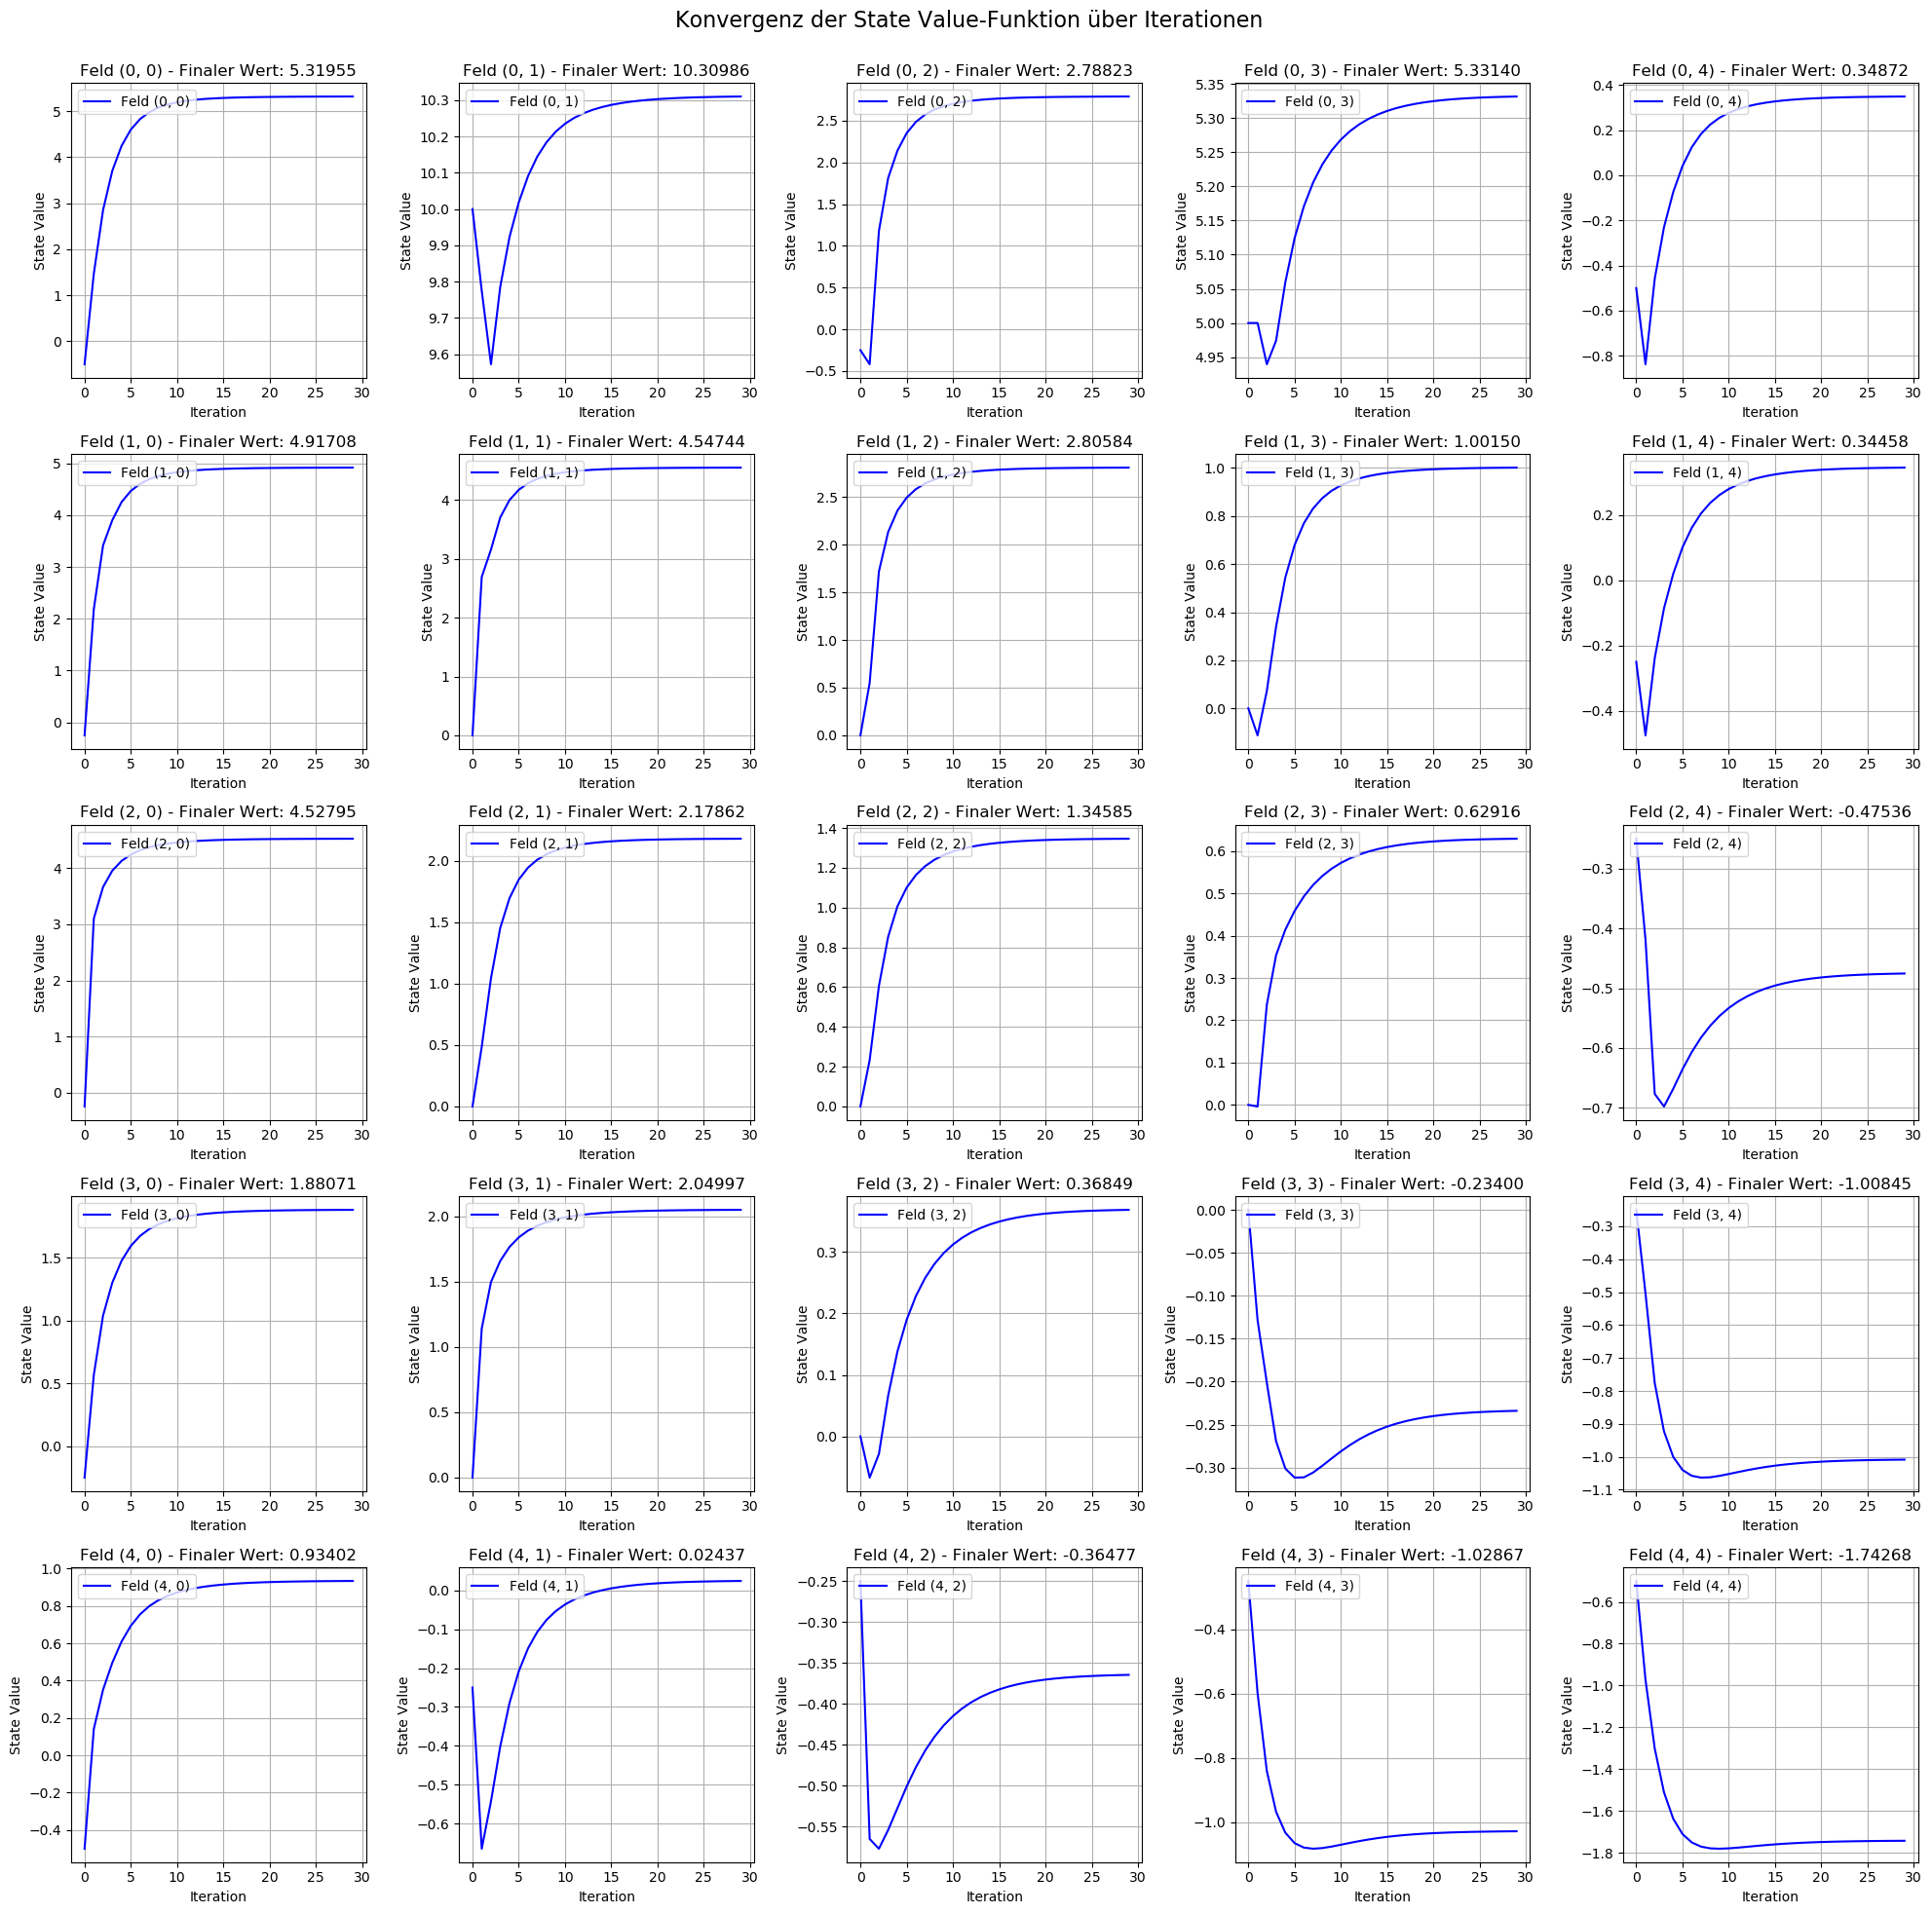

[5.319547893782753, 10.309864681851318, 2.7882274370529876, 5.331397171137016, 0.34871705849959067]
[4.917075870208189, 4.547436907926073, 2.8058405250253347, 1.0015014043615795, 0.34457683081641854]
[4.527949208389998, 2.1786164678201527, 1.345851223372948, 0.6291613147479042, -0.4753644431283891]
[1.8807146909865142, 2.0499695643885016, 0.36848616178085175, -0.23400265928352046, -1.0084524729451694]
[0.9340168267643387, 0.024371941373569905, -0.3647677233645781, -1.0286721399334975, -1.7426785088540095]


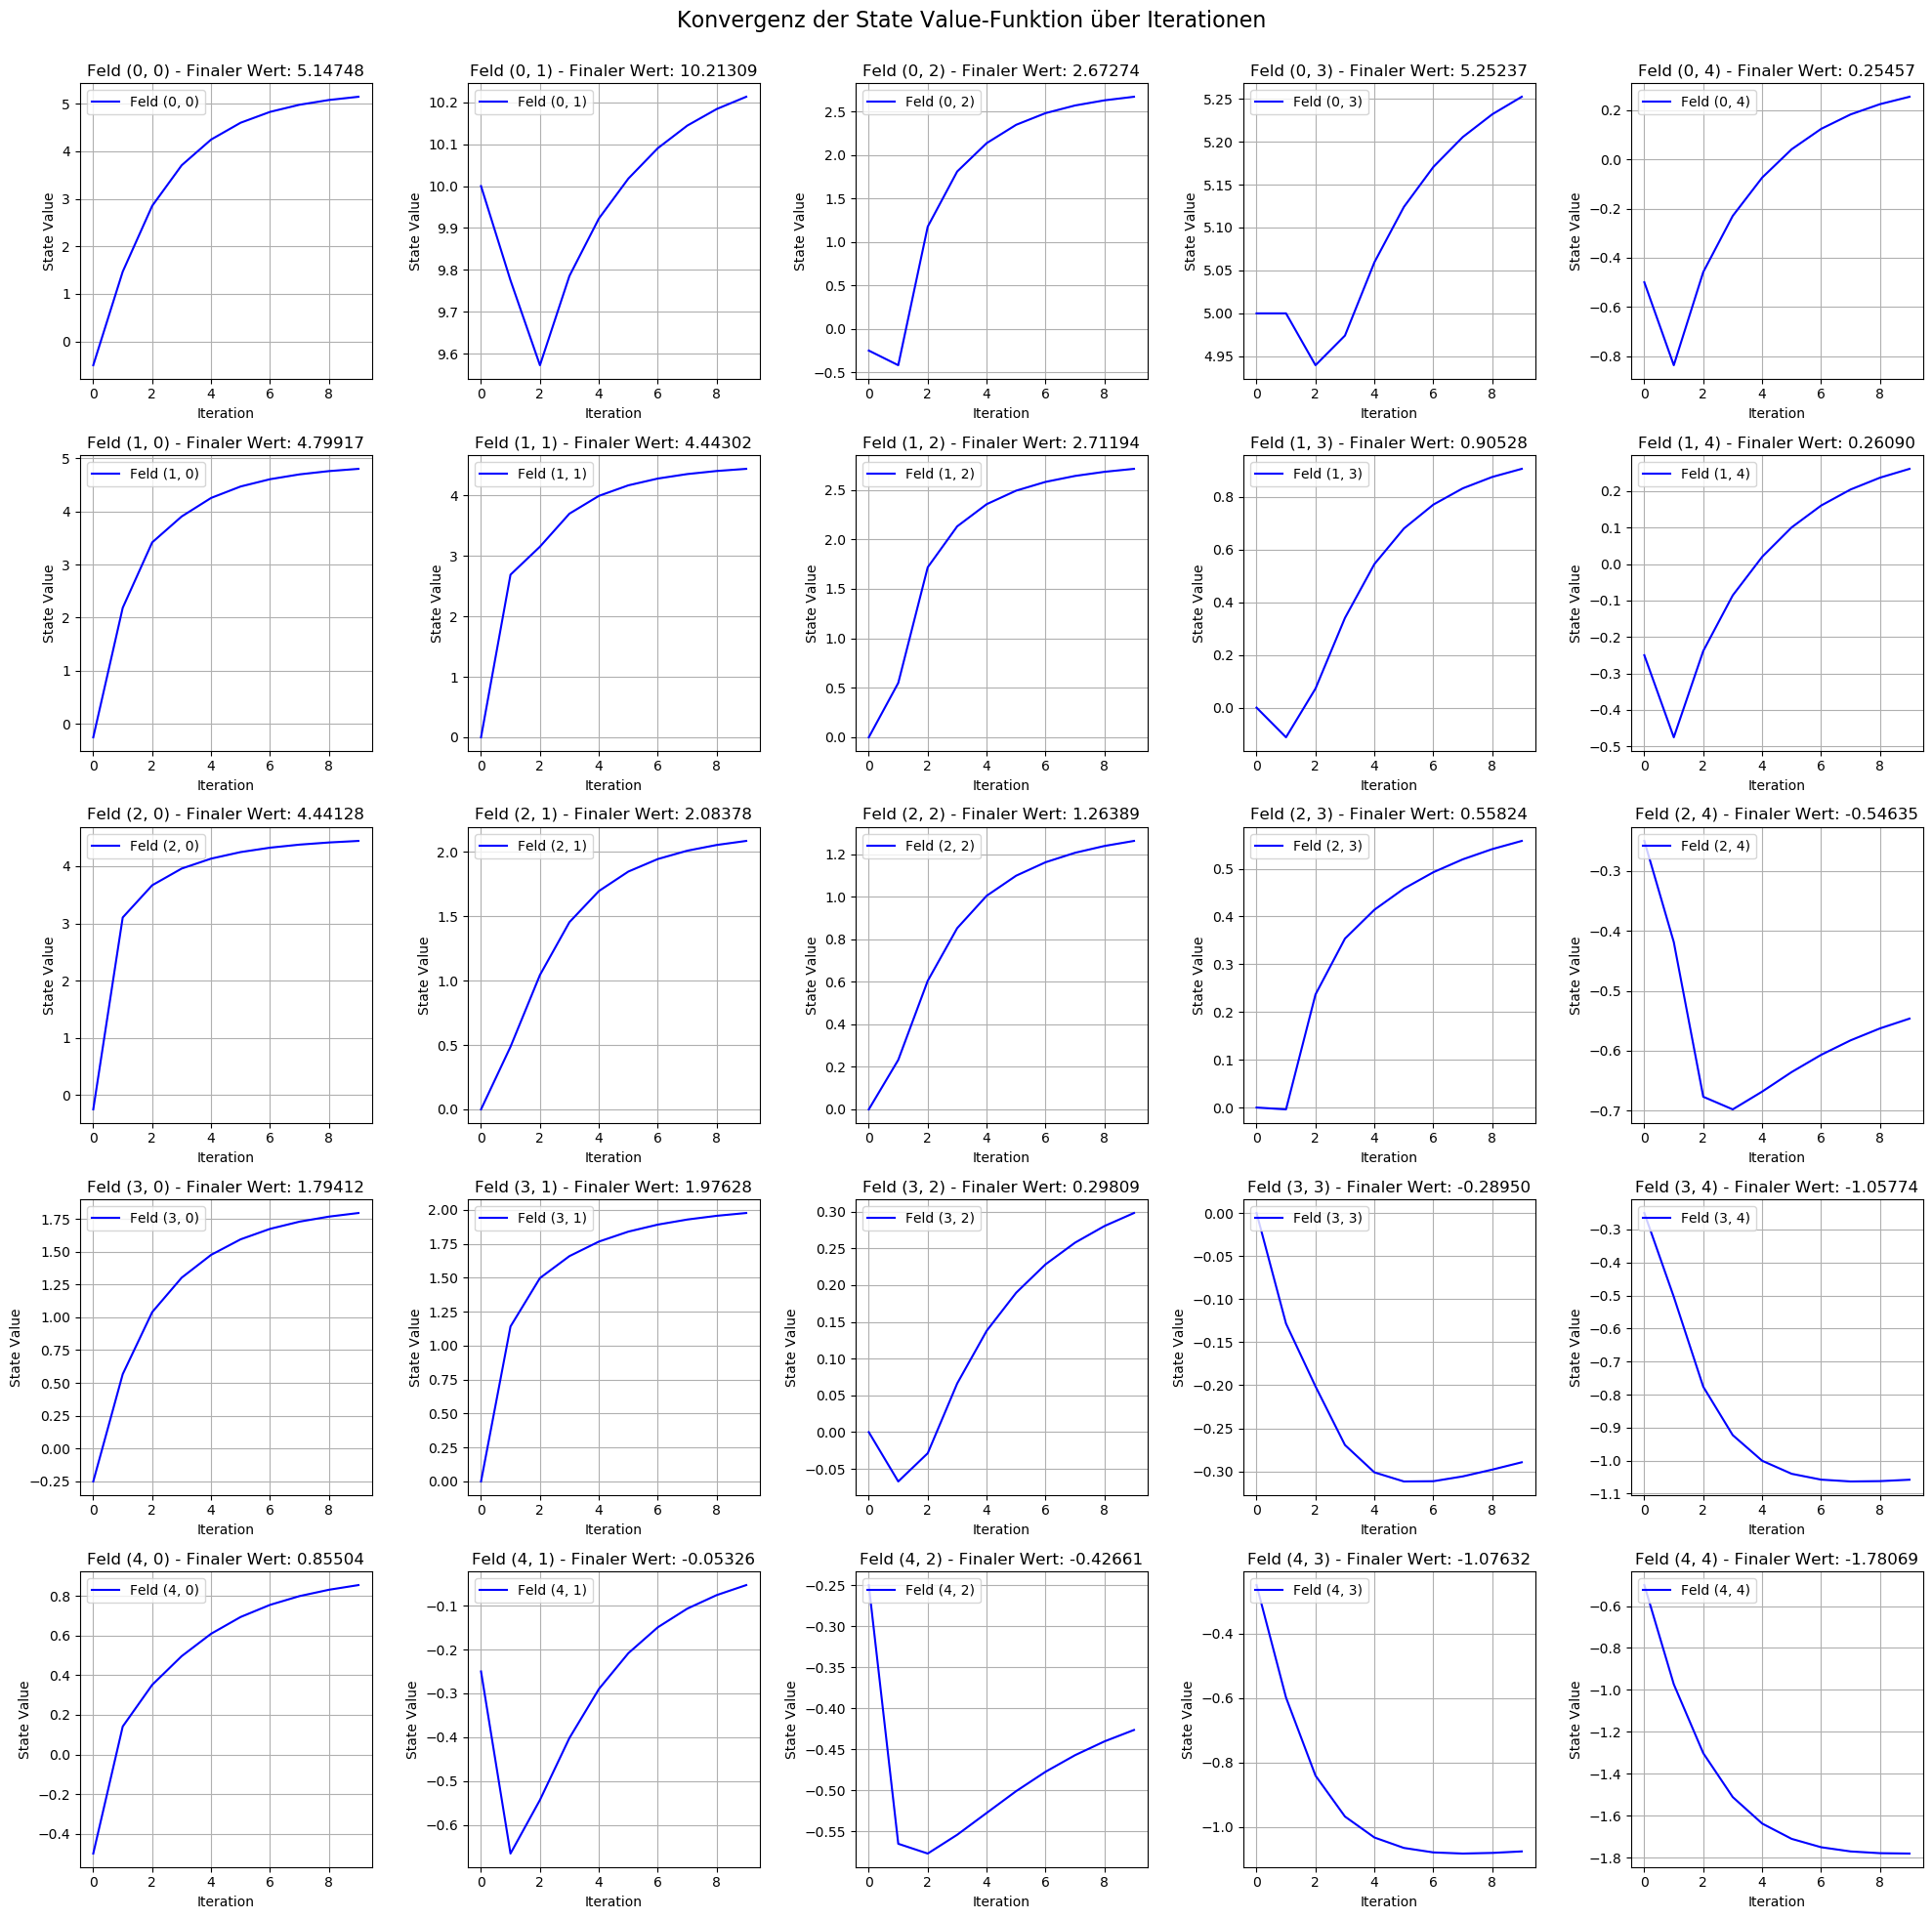

[5.1474790111818365, 10.213089600812108, 2.672738111280137, 5.252368578973335, 0.25457423796010187]
[4.799174307839007, 4.44301875882495, 2.7119432925733693, 0.9052801862013631, 0.26090360932207746]
[4.441281406318764, 2.083776455528285, 1.2638905308116046, 0.5582425912771983, -0.5463460946882428]
[1.794116250743361, 1.9762780662328454, 0.29808691710939694, -0.289498015697605, -1.0577359152753705]
[0.8550446494485137, -0.05325731377105758, -0.42661055710697593, -1.0763192170048377, -1.780689827225174]


In [39]:
# Make an instance of the mdp class
# Gamma is 0.9 as in the given assignment
# Iterations are 30. One can set more, but 30 is enough to see convergence and also the differences in the curves at the beginning
mdp1 = mdp(gamma=0.9,iters=30)
mdp1.iterativeBellmann()

# In Comparison: Here is a bellmann function with only 10 iterations
mdp2 = mdp(gamma=0.9,iters=10)
mdp2.iterativeBellmann()